### Tensorflow 기초
1. tensorflow란
    * tensor는 데이터를 담는 다차원 배열.
    * 이것의 흐름을 tensorflow라고 표현.
    * 수학적인 계산을 각 node와 edge로 표현함
    * node는 수학적 계산, edge는 데이터의 입출력 표현
2. 이러한 tensorflow의 계산, 데이터 흐름을 나타낸 것을 **Graph**라고 함.(*수학 용어로 node와 edge를 나타낸 것.*)
    * graph상의 Node를 Opeartion(계산) 이라고 함.
    * graph를 실행하기 위해서는 항상 Session 객체가 필요함. Session()클래스로 생성.
        * Session은 오퍼레이션의 실행환경을 캡슐화 한 것.
    * 변수는 그래프의 실행시 패러미터를 저장하고 갱신하는 데에 사용. *메모리 상의 텐서를 저장하는 **버퍼** 역할*
![Image of Tensorflow](https://camo.githubusercontent.com/4ee55154486232ec9edd8f1a3bad4c4a146f6cfe/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74656e736f72735f666c6f77696e672e676966)

In [44]:
#tensorflow 상수
import tensorflow as tf

import matplotlib.pyplot as plt


hello = tf.constant('hello, tensorflow!')

sess = tf.Session()

print sess.run(hello)

Tensor("Const_18:0", shape=(), dtype=string)
hello, tensorflow!


* Tensor끼리는 그냥 계산을 할 수가 없다.
* **Session** 속에서 계산을 해야한다.

In [47]:
a = tf.constant(3)
b = tf.constant(4)
c = a+b
# node
# deferred caculation
# 왜 그런 것일까?
# 미분을 쫙 해주기 위해서. 미분에 용이하다고 함.
# 분산처리가 가능하게 하기 위해서.

sess.run(c)

7

In [24]:
# 변수를 0 으로 초기화.
state = tf.Variable(0, name='counter')


# state 에 1 을 더할 Operator 생성 (node가 하나 만들어지는 것.)
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# graph는 처음에 변수 초기화가 필수
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    print(sess.run(state))
    
    for _ in range (3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


## 경사 하강법으로 인자 찾아내기
---


In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd

# numpy, matplotlib, seaborn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


#결정해야하는 변수는 계수.
# y= a x1 + b x2 + c
#(실제 y - a x1 + bx2 + c)^2 => minimize a,b,c
# matlab * 1. cost-function  2. gradient

#random data
x_data = np.float32(np.random.rand(2,100))

print(x_data.shape)
print type(x_data)

y_data = np.dot([0.100, 0.200], x_data) + 0.300


(2, 100)
<type 'numpy.ndarray'>


In [59]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

#손실 함수 정의
loss = tf.reduce_mean(tf.square(y - y_data))

#gradient Descent 객체를 가져오기
optimizer = tf.train.GradientDescentOptimizer(0.001)

#Deep 해 질수록 , 변수가 많아질수록 발산하기가 쉬워지기 때문에 작은 값을 쓰는 것이 좋다!

#train 노드 정의
train = optimizer.minimize(loss)

[[ 0.10000863  0.20001037]] [ 0.29999006]


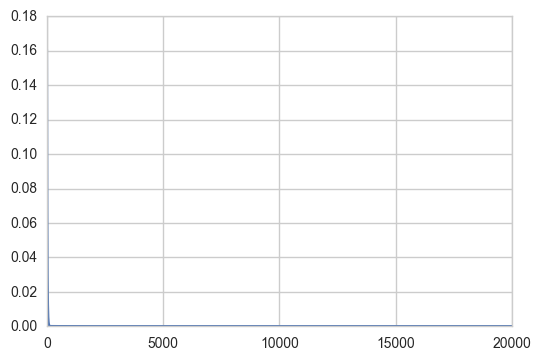

In [61]:
loss_list = []

#변수 초기화 노드
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)
for i in xrange(0,20000):
    sess.run(train)

    loss_list.append(sess.run(loss))
    
plt.plot(loss_list)
print sess.run(W), sess.run(b)
#     print sess.run(loss), sess.run(W), sess.run(b)
    
# fig = plt.figure()
# theta1 = sess.run(W)[0][0]
# theta2 = sess.run(W)[0][1]
# ax = fig.add_subplot(111, projection='3d')
# X = x_data[0]
# Y = x_data[1]
# Z = np.dot([theta1, theta2], x_data) + sess.run(b)[0]
# ax.plot_surface(X,Y,Z, rstride=4, cstride=4, color='b')

# print sess.run(W), sess.run(b)

## 로지스틱 Regression
---

In [96]:
#logistic regression
train = pd.read_csv('./train.csv')
train['Embarked'] = train['Embarked'].fillna("S")
train['Pclass'] = train['Pclass'].fillna(1)
train["Fare"].fillna(train["Fare"].mean(), inplace=True)
train["Age"].fillna(train["Age"].median(), inplace=True)
train["SibSp"].fillna(train["SibSp"].median(), inplace=True)
train["Parch"].fillna(train["Parch"].median(), inplace=True)


test = pd.read_csv('./test.csv')
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# train.head(10)

a = train['Survived']

# train.drop(['Survived'], axis=1, inplace=True)

# train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
pids = train['PassengerId']

dummy_sex = pd.get_dummies(train['Sex'])

dummy_pclass = pd.get_dummies(train['Pclass'])

age = train['Age'].astype(np.float32)
sibSp = train['SibSp'].astype(np.float32)
parch = train['Parch'].astype(np.float32)
fare = train['Fare'].astype(np.float32)

dummy_data = dummy_sex.join(age)
print (dummy_data.info())
# for i in xrange(800):
#     print type(fare[i])

print dummy_data.shape

print(dummy_data.head(5))

X = dummy_data.as_matrix()
X = np.float32(X)
Y = np.float32(train['Survived'].as_matrix())

print X.shape, Y.shape
theta_dimension = X.shape[1]
print theta_dimension

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
female    891 non-null uint8
male      891 non-null uint8
Age       891 non-null float32
dtypes: float32(1), uint8(2)
memory usage: 5.3 KB
None
(891, 3)
   female  male   Age
0       0     1  22.0
1       1     0  38.0
2       1     0  26.0
3       1     0  35.0
4       0     1  35.0
(891, 3) (891,)
3


In [92]:
# train.head(6)

In [124]:
#변수 W와 b
W = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

#cost값 구하기
h = tf.matmul(X, W) + b
hypothesis = tf.div(1.0 , 1.0 + tf.exp(-h))
cost_sum = Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis)
cost = tf.reduce_mean(-cost_sum)

#train node만들기
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(cost)

#계산 시작
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#cost 를 plot해보자!
cost_list =[]
print np.isnan(sess.run(cost_sum)).any()
print np.isnan(sess.run(cost)).any()

print sess.run(cost)
# print sess.run(train)
# for step in xrange(20):
# #     print sess.run(hypothesis) 

#     sess.run(train)
#     cost_list.append(sess.run(cost))
#     if step % 20 == 0:
#         print step, sess.run(cost)

# plt.plot(cost_list)
# weight = sess.run(W)

False
False
1.59517
None


## train data로 계산하기.

In [31]:
test['Embarked'] = test['Embarked'].fillna("S")
test['Pclass'] = test['Pclass'].fillna(1)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["SibSp"].fillna(test["SibSp"].median(), inplace=True)
test["Parch"].fillna(test["Parch"].median(), inplace=True)

dummy_sex = pd.get_dummies(test['Sex'])

dummy_pclass = pd.get_dummies(test['Pclass'])

pids = test['PassengerId']
print (pids)
age = test['Age']
sibSp = test['SibSp']
parch = test['Parch']
fare = test['Fare']

test_data = dummy_sex.join(dummy_pclass).join(age).join(sibSp)

result = np.dot(test_data, weight)
print result.size
print result
for i in xrange(0,418):
    if result[i] > 0.5:
        result[i,0] = 1 
    else:
        result[i,0] = 0
# print result
# res = pids.join(result)
result = result.reshape(418)
# print pids.shape, result.reshape(418)

# print result
pids = pids.as_matrix()
print type(result), type(pids)
result_data = pd.DataFrame(data=[pids, result], index=['PassengerId', 'Survived'])

result_data = result_data.T
result_data['PassengerId'] = result_data['PassengerId'].astype(int)
result_data['Survived'] = result_data['Survived'].astype(int)

print result_data.head(10)

result_data.to_csv('result_titanic.csv', sep=',', encoding='utf-8', index=False)



0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, dtype: int64
418
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
